<a href="https://colab.research.google.com/github/aditya-kurup/ml-lab/blob/main/midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

gradient


In [4]:
import sympy as sp


In [5]:
x,y = sp.symbols('x y')

In [6]:
f = x**2 + 2*y**2

In [14]:
grad = sp.Matrix([sp.diff(f, x), sp.diff(f, y)])
print(grad)

Matrix([[2*x], [4*y]])


jacobian

In [15]:
import sympy as sp

In [17]:
x,y,z = sp.symbols('x y z')

In [18]:
f1 = x**2 + y*z
f2 = y**2 + x*z
f3 = z**2 + x*y

In [19]:
vec = sp.Matrix([x, y, z])

In [20]:
func = sp.Matrix([f1, f2, f3])

In [21]:
J = func.jacobian(vec)

In [22]:
print(J)

Matrix([[2*x, z, y], [z, 2*y, x], [y, x, 2*z]])


eigen vec

In [23]:
import numpy as np

In [24]:
A = np.array(([[1, 2, 3], [4, 5, 6], [7, 8, 9]]))

In [25]:
print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [26]:
eigenval,eigenvect = np.linalg.eig(A)

In [28]:
print(eigenval)
print(eigenvect)

[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


svd

In [29]:
U,s,Vt = np.linalg.svd(A)

In [30]:
print(U)
print(s)
print(Vt)

[[-0.21483724  0.88723069  0.40824829]
 [-0.52058739  0.24964395 -0.81649658]
 [-0.82633754 -0.38794278  0.40824829]]
[1.68481034e+01 1.06836951e+00 4.41842475e-16]
[[-0.47967118 -0.57236779 -0.66506441]
 [-0.77669099 -0.07568647  0.62531805]
 [-0.40824829  0.81649658 -0.40824829]]


knn


In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [37]:
iris = load_iris()


In [72]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, roc_curve, auc
)


In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(iris.data,iris.target,test_size = 0.3,random_state = 42)

In [61]:
knn = KNeighborsClassifier(n_neighbors=9, metric = 'manhattan')

In [62]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9)

In [63]:
y_pred = knn.predict(X_test)

In [64]:
accuracy = knn.score(X_test, Y_test)
print(accuracy)

0.9777777777777777


In [73]:
acc = accuracy_score(Y_test,y_pred)
print(acc)

0.9777777777777777


In [75]:
y_prob = knn.predict_proba(X_test)[:, 1]
print(y_prob)

[0.77777778 0.         0.         0.88888889 0.77777778 0.
 1.         0.22222222 0.77777778 1.         0.11111111 0.
 0.         0.         0.         0.55555556 0.         1.
 1.         0.         0.         0.55555556 0.         0.
 0.         0.11111111 0.         0.         0.         0.
 0.         0.         1.         0.         0.         0.22222222
 1.         0.         0.         0.         0.11111111 0.77777778
 0.88888889 0.         0.        ]


In [79]:
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Precision:", precision_score(Y_test, y_pred, average='weighted'))
print("Recall:", recall_score(Y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(Y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))


Accuracy: 0.9777777777777777
Precision: 0.9793650793650793
Recall: 0.9777777777777777
F1 Score: 0.9777448559670783

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [81]:
fpr,tpr,_ = roc_curve(Y_test,y_prob)
roc_auc = auc(fpr, tpr)

ValueError: multiclass format is not supported

decision trees


In [98]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [99]:
cancer = load_breast_cancer()

In [100]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,
random_state=42)


In [101]:
dtc = DecisionTreeClassifier(criterion = "gini")

In [102]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [103]:
y_pred = dtc.predict(X_test)

In [108]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


y_prob = dtc.predict_proba(X_test)[:, 1]


Accuracy: 0.935672514619883
Precision: 0.9801980198019802
Recall: 0.9166666666666666
F1 Score: 0.9473684210526315

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92        63
           1       0.98      0.92      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



In [110]:
import matplotlib.pyplot as plt


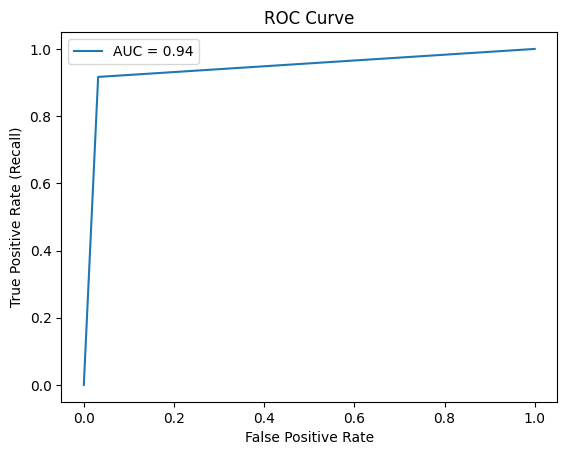

In [115]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()

svm and krr

In [117]:
from sklearn.svm import SVC
from sklearn.kernel_ridge import KernelRidge
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error

In [118]:
iris = load_iris()
X = iris.data
y = iris.target

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [137]:
svm = SVC(kernel='linear', C=1.0)

svm.fit(X_train, y_train)

SVC(kernel='linear')

In [138]:
y_pred = svm.predict(X_test)


In [139]:
accuracy = accuracy_score(y_test, y_pred)

In [140]:
print("SVM Accuracy:", accuracy)


SVM Accuracy: 0.9777777777777777


In [141]:
krr = KernelRidge(kernel='rbf', alpha=0.5, gamma=0.1)
krr.fit(X_train, y_train)
y_pred = krr.predict(X_test)


In [142]:
mse = mean_squared_error(y_test, y_pred)
print("KRR Mean Squared Error:", mse)

KRR Mean Squared Error: 0.04513725617998168


In [144]:
y_pred = np.round(y_pred).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9777777777777777
Precision: 0.9796296296296295
Recall: 0.9777777777777777
F1 Score: 0.9779434092477569

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



logistic regression

In [155]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

In [156]:
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

In [157]:
lr_model = LogisticRegression(penalty="l1", C=1, solver='liblinear', max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')

In [158]:
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

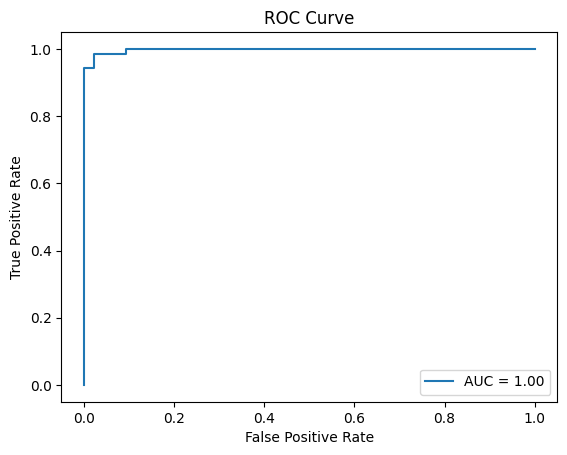

In [159]:
y_prob = lr_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

linear regression

In [160]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [162]:
housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)

In [163]:
lin_reg = LinearRegression()

In [164]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [167]:
y_pred = lin_reg.predict(X_test)

In [169]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse,mae,rmse)

0.5558915986952422 0.533200130495698 0.7455813830127749


ValueError: x and y must be the same size

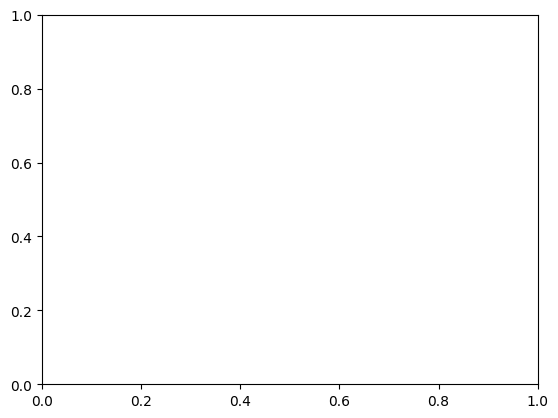

In [171]:
# Flatten X_test for plotting
X_test_flat = X_test.ravel()

# Scatter plot of actual data
plt.scatter(X_test_flat, y_test, color="blue", alpha=0.5, label="Actual data")